Part A: IMDb Movie Review Sentiment Analysis

In [2]:
#1. Data Exploration and Preprocessing

In [3]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
#Data Exploration

In [5]:
df = pd.read_csv('data_imdb.csv')

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df.shape

(50000, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [10]:
unique_docs = df['review'].nunique()
unique_docs

49581

In [72]:
df.drop_duplicates(subset='review',inplace=True) 
#Review column had 419 duplicate values. Removed all the duplicates

In [73]:
df.shape

(49575, 2)

In [13]:
sentiments = df['sentiment'].value_counts()
sentiments

sentiment
positive    24884
negative    24697
Name: count, dtype: int64

In [14]:
df['sentiment'].value_counts(normalize=True) * 100

sentiment
positive    50.18858
negative    49.81142
Name: proportion, dtype: float64

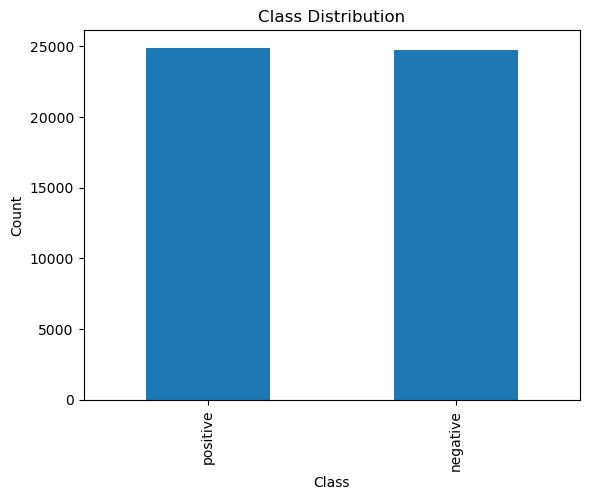

In [15]:
df['sentiment'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

As we can clearly see through the plot, there is no imbalance in data

In [16]:
len(df)

49581

In [17]:
#Preprocessing

In [18]:
df['review'] = df['review'].str.lower()

In [19]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [20]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
    clean_text = BeautifulSoup(text, "html.parser").get_text()
    
    tokens = word_tokenize(clean_text)

    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

processed_docs = [preprocess(text) for text in df['review']]
#processed_docs[:2]

C:\Users\gaura\AppData\Local\Temp\ipykernel_4208\2463967613.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_text = BeautifulSoup(text, "html.parser").get_text()


Used BeautifulSoup because text contains br tags which is not required.

In [21]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_tokens = [[stemmer.stem(token) for token in doc]for doc in processed_docs]
#stemmed_tokens

lemmatized_tokens = [[lemmatizer.lemmatize(token) for token in doc] for doc in processed_docs]
#lemmatized_tokens

In [22]:
# 2. Feature Engineering

In [26]:
cleaned_tokens = [" ".join(tokens) for tokens in lemmatized_tokens]
#cleaned_tokens[:2]

In [24]:
vectorizer = CountVectorizer()

bow_matrix = vectorizer.fit_transform(cleaned_tokens)

bow_features = vectorizer.get_feature_names_out()

small_array = bow_matrix[:5].toarray()
print(small_array)

print(bow_matrix.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(49581, 97579)


In [25]:
vectorizer2 = TfidfVectorizer()
tfidf_matrix = vectorizer2.fit_transform(cleaned_tokens)

tfidf_features = vectorizer2.get_feature_names_out()

small_array2 = tfidf_matrix[:5].toarray()
print(small_array2)

print(tfidf_matrix.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(49581, 97579)


In [27]:
df['review'] = cleaned_tokens

In [28]:
df.head()

,review,sentiment
0,one reviewer mentioned watching 1 oz episode '...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically 's family little boy jake think 's z...,negative
4,petter mattei 's `` love time money '' visuall...,positive


In [29]:
# 3. Model Development

In [30]:
X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [32]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [33]:
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

LinearSVC()

In [34]:
# 4. Model Evaluation 

In [35]:
y_pred = model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4995
    positive       0.88      0.90      0.89      4922

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917

[[4373  622]
 [ 490 4432]]


In [36]:
y_pred = svm_model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4995
    positive       0.87      0.89      0.88      4922

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917

[[4368  627]
 [ 550 4372]]


Build model with logistic regression and SVM and check for the best performance out of those. So logistic regression giving accuracy of 0.89 and SVM 0.88 so in this scenario logistic regression performance is quite good.

Part B : News Article Classification

In [37]:
# 1. Data Collection and Preprocessing 

In [38]:
#Data Exploration

In [39]:
df2 = pd.read_csv('data_news.csv')

In [40]:
df2.head()

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [41]:
df2.shape

(50000, 5)

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [43]:
df2.isnull().sum()

category                0
headline                0
links                   0
short_description       0
keywords             2668
dtype: int64

In [44]:
df2 = df2.drop(columns=['keywords'])

Droped the keyword column beacuase it was having 2668 missing values and anyway headline and short description carries enough information. So keywords column is not essential.

In [45]:
len(df2)

50000

In [46]:
df2.duplicated().sum()

4251

In [47]:
df2["text"] = df2["headline"] + " " + df2["short_description"]
#combined both features

In [48]:
df2 = df2.drop(columns=["headline", "short_description", "links"])

Droped these three columns because already created a new feature by combining headline and short description and links column is also not essential as input features. So text will be my input feature and catagory will be target feature.

In [49]:
df2 = df2.dropna(subset=["category", "text"])

In [50]:
df2 = df2.drop_duplicates(subset=["text"])

In [51]:
df2.shape

(45749, 2)

In [52]:
df2["category"].value_counts()

category
WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          3091
SPORTS            2658
Name: count, dtype: int64

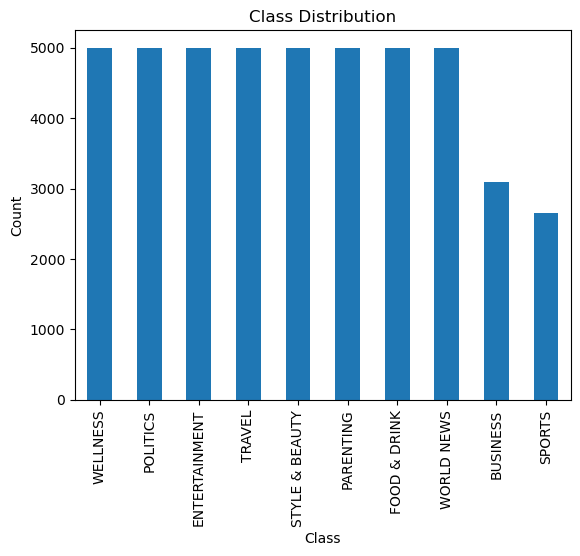

In [53]:
df2['category'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

According to the plot mild imbalance is there which model will handle efficiently.

In [54]:
#Preprocessing

In [55]:
df2['text'] = df2['text'].str.lower()

In [56]:
stop_words = set(stopwords.words('english'))

def preprocess2(text):
    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

processed_docs2 = [preprocess2(text) for text in df2['text']]
#preprocessed_docs2[:2]

In [57]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [[lemmatizer.lemmatize(token) for token in doc] for doc in processed_docs2]
#lemmatized_tokens[:2]

In [58]:
cleaned_tokens = [" ".join(tokens) for tokens in lemmatized_tokens]

In [59]:
#cleaned_tokens[:2]

In [60]:
# 2. Feature Extraction

In [61]:
vectorizer2 = TfidfVectorizer()
tfidf_matrix = vectorizer2.fit_transform(cleaned_tokens)

In [62]:
df2['text'] = cleaned_tokens

In [63]:
df2.head()

,category,text
0,WELLNESS,143 mile 35 day lesson learned resting part tr...
1,WELLNESS,talking crazy crazy helpful think talking tool...
2,WELLNESS,crenezumab trial gauge whether alzheimer 's dr...
3,WELLNESS,oh difference made want busy keep trying perfe...
4,WELLNESS,green superfoods first bad news soda bread cor...


In [64]:
# 3. Model Development and Training

In [65]:
X = df2['text']
y = df2['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [66]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [67]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [68]:
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

LinearSVC()

In [69]:
# 4. Model Evaluation 

In [70]:
y_pred = model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                precision    recall  f1-score   support

      BUSINESS       0.73      0.62      0.67       631
 ENTERTAINMENT       0.75      0.80      0.78       990
  FOOD & DRINK       0.86      0.87      0.86       994
     PARENTING       0.77      0.79      0.78       973
      POLITICS       0.78      0.76      0.77      1001
        SPORTS       0.84      0.70      0.77       533
STYLE & BEAUTY       0.86      0.84      0.85      1027
        TRAVEL       0.81      0.80      0.80       983
      WELLNESS       0.72      0.78      0.75      1024
    WORLD NEWS       0.77      0.82      0.79       994

      accuracy                           0.79      9150
     macro avg       0.79      0.78      0.78      9150
  weighted avg       0.79      0.79      0.79      9150

[[393  21  18  16  54   9   6  11  69  34]
 [  9 793  11  44  30  12  29  18  25  19]
 [  9  12 866  19   7   6  17  22  28   8]
 [  8  27  13 768  22   5  26  17  80   7]
 [ 48  28   2  18 758   4   5  14  21 103

In [71]:
y_pred = svm_model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                precision    recall  f1-score   support

      BUSINESS       0.68      0.61      0.64       631
 ENTERTAINMENT       0.77      0.78      0.77       990
  FOOD & DRINK       0.83      0.86      0.85       994
     PARENTING       0.76      0.80      0.78       973
      POLITICS       0.77      0.74      0.76      1001
        SPORTS       0.78      0.73      0.76       533
STYLE & BEAUTY       0.85      0.85      0.85      1027
        TRAVEL       0.78      0.79      0.79       983
      WELLNESS       0.72      0.72      0.72      1024
    WORLD NEWS       0.77      0.81      0.79       994

      accuracy                           0.78      9150
     macro avg       0.77      0.77      0.77      9150
  weighted avg       0.78      0.78      0.78      9150

[[384  22  20  22  49   9  10  17  65  33]
 [ 14 770  13  37  27  24  42  20  22  21]
 [  9  13 859  23   6  10  14  28  22  10]
 [ 11  21  13 775  19  11  23  25  70   5]
 [ 55  26   5  18 738  13   5  16  27  98

**Final report is in the pdf document**